## 人工构造的数据集

* 导入所需要的包或模块

In [2]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

* 随机生成实验所需要的二分类数据集x1和x2,分别对应的标签y1和y2

In [3]:
n_data = torch.ones(120,2) #数据的基本形态
x1 = torch.normal(2*n_data,1)
y1 = torch.zeros(120)
x2 = torch.normal(-2*n_data,1)
y2 = torch.ones(120)

x = torch.cat((x1,x2),0).type(torch.FloatTensor)
y = torch.cat((y1,y2),0).type(torch.FloatTensor)

* 使用matplotlib将所构造的数据可视化

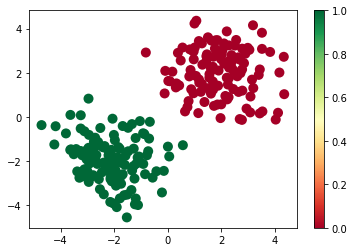

In [5]:
plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],c=y.data.numpy(),s=100,lw=0,cmap='RdYlGn')
plt.colorbar()
plt.savefig('二分类样本')
plt.show()

## Fashion-MNIST数据集（一个多类图像分类数据集）

* 训练集：60,000
* 测试集：10,000
* 每个样本的数据格式为：28×28×1
* 类别(10类): dress(连衣裙)、coat(外套)、sandal(凉鞋)、shirt(衬衫)、sneaker(运动鞋)、bag(包)和ankle boot(短靴)

* 导入需要的包或模块

In [27]:
import torch
import torchvision
import torchvision.transforms as transforms

### 加载Fashion-MNIST数据集（采用已经划分好的训练集和测试集）

* 指定参数transform = transforms.ToTensor(),将所有数据类型转换为Tensor，transforms.ToTensor()可以将尺寸为（H×W×C）且数据位于[0, 255]的PIL图片或者数据类型为np.unit8的Numpy数组转换为尺寸为（C×H×W）且数据类型为torch.float32且位于[0.0, 1.0]的Tensor

In [28]:
mnist_train = torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST',train=True,
                                                download=True,transform=transforms.ToTensor())

mnist_test = torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST',train=False,
                                                download=True,transform=transforms.ToTensor())

Extracting C:\Users\Administrator/Datasets/FashionMNIST\FashionMNIST\raw\train-images-idx3-ubyte.gz to C:\Users\Administrator/Datasets/FashionMNIST\FashionMNIST\raw


Extracting C:\Users\Administrator/Datasets/FashionMNIST\FashionMNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\Administrator/Datasets/FashionMNIST\FashionMNIST\raw


Extracting C:\Users\Administrator/Datasets/FashionMNIST\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\Administrator/Datasets/FashionMNIST\FashionMNIST\raw


Extracting C:\Users\Administrator/Datasets/FashionMNIST\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\Administrator/Datasets/FashionMNIST\FashionMNIST\raw
Processing...
Done!


* 通过DataLoader读取小批量数据样本

In [29]:
batch_size = 256
train_iter = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size,shuffle=True)
test_iter = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size,shuffle=False)